## Breakpoints
   
Definition:a **Synteny blockn** $S(n)$ is simply a sequence ordered pair which is indexed and named: 
$s = (a_i, b_i)$, $i = 0,\dots, n-1$. We also define $-S_i = (b_i,a_i)$ the reverse of $S_i$.


Definition: A reordering $\pi$ of $[0, n]$ is a sequence over $\{\pm i\}_0^{n-1}$
for example $\pi = [0,-3,-2,1,4,1]$.
In case that $|\pi|$ is a permutation, we call $\pi$ a reversals permutation or just a permutation.

A permutation corresponds to an ordering of the blocks $s_i$ including reversals.
For example $\pi = [-3,-2,1,0]$ corresponds to $[-s_3, -s_2, s_1, s_0]$.

We say that $s_i$ is adjacent to $s_j$ ($-s_j$) if there is a $k$ such that $\pi[k] = i$ and $\pi[k+1 \mod n] = j$
$(\pi[k+1 \mod n] = -j)$.

For example in $\pi=[0,2,-1]$ $-s_1$ is adjacent to $s_0$ and $s_0$ is adjacent to $s_2$. But our graph is going to be undirected and therefore if $s_i$ is adjacent to $s_j$ we will also consider $s_j$ to be adjacentg to $s_i$ (in $\pi$).

We call $[0,1,\dots, n-1]$ the identity permutation.


Given $\pi$ We call the corresponding sequence of blocks its genome. The genome corresponding to the identity permutation is
the reference genome.

The **Breakpoint graph*** for two genomes (reference) and $\pi$, is the follwoing Graph: $G=(V,E)$,
$V = \{a_i,b_i\}_{i=0}^{n-1}$. Black edges $(a_i, b_i)$ for every block. blue edges $(b_i, a_{i+1})$ representing the reference genome
including the edge $(b_{n-1}, a_0)$.
And green edges correspond to the adjacencies of $\pi$.

Below is an example for a breakpoint graph for $\pi = [0,-4,-3,2,1]$

Below we first show the 'breakpoint graph' for one genome (the reference on $10$ blocks). It is a simple cycle.

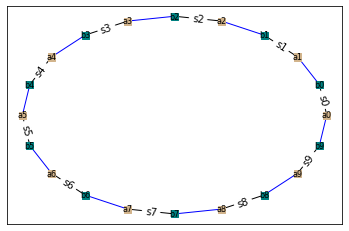

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path as op
import pygraphviz as pgv

import toolz

#plt.ion()
#%matplotlib inline

G = nx.MultiGraph()
a_nodes = ["a"+str(i) for i in range(10)]
b_nodes = ["b"+str(i) for i in range(10)]
my_nodes = list(toolz.interleave([a_nodes, b_nodes]))
G.add_nodes_from(my_nodes)
blackedges = list(zip(a_nodes, b_nodes))
bnames = ["s"+str(i) for i in range(len(blackedges))]
blueEdges = list(zip(b_nodes[-1:]+b_nodes[:-1], a_nodes))
bdict = dict(zip(blackedges, bnames))
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G,pos, node_shape="s", label= nx.draw_networkx_labels(G,
    pos, font_size=8), node_color=["tan", "teal"]*10, node_size=50,)


nx.draw_networkx_edges(G, pos,
        edgelist=list(zip(a_nodes, b_nodes)),
        edge_color="black",
        label=nx.draw_networkx_edge_labels(G,pos,edge_labels=bdict), )

nx.draw_networkx_edges(G, pos,
        edgelist=blueEdges,
        edge_color="blue",
        )



def getLEnd(i,A):
    n = len(A)
    x = str(abs(A[i % n]))
    if A[i % n]<0:
        #return "a"+str(A[i % n])
        return "a"+x
    else:
        #return "b"+str(A[i % n])
        return "b"+x
def getREnd(i,A):
    n = len(A)
    x = str(abs(A[i % n]))
    if A[i % n]<0:
        return "b"+x
        #return "b"+str(A[i % n])
    else:
        #return "a"+str(A[i % n])
        return "a"+x

def createBPG(p,r, plot=True):
    """ parameters p,r: lists of integers which represents a reversal
    cyclic permutation. It will be used to create a breakpoint graph
    against the reference.
    The reference has blue edges. P has green edges. The synteny
    blocks are represented as black edges.
    optional param plot: if True the graph will be plotted.
    """
    p = list(p)
    r = list(r)
    ns = sorted(np.abs(p+r))
    ns = list(np.unique(ns))
    a_nodes = ["a"+str(abs(i)) for i in ns]
    b_nodes = ["b"+str(abs(i)) for i in ns]
    my_nodes = list(toolz.interleave([a_nodes, b_nodes]))
    G = nx.MultiGraph()
    G.add_nodes_from(my_nodes)
    blackedges = list(zip(a_nodes, b_nodes))
    #blocknames = ["s"+str(i) for i in range(len(blackedges))]
    blocknames = ["s"+str(i) for i in ns]
    blockdict = dict(zip(blackedges, blocknames))
    #blueedges = [("b"+str(r[i % len(r)]), "a"+str(r[(i+1) % len(r)])) for i in range(len(r))]
    blueedges = [(getLEnd(i,r), getREnd(i+1,r)) for i in range(len(r))]
    greenedges = [(getLEnd(i,p), getREnd(i+1,p)) for i in range(len(p))]
    greenOnlyedges = [(u,v) for u,v in greenedges if ((u,v) not in blueedges) and ((v,u) not in blueedges)]
    #greenedges = [("b"+str(p[i % len(p)]), "a"+str(p[(i+1) % len(p)])) for i in range(len(p))]
    #G.add_edges_from(zip(a_nodes, b_nodes), color="black", weight=10)
    #G.add_edges_from(zip(b_nodes, a_nodes[1:]+a_nodes[0:1]), color="blue", weight=1)
    pos = nx.circular_layout(G)
    G.add_edges_from(blackedges, color="black", weight=10)
    G.add_edges_from(blueedges, color="blue", weight=1)
    G.add_edges_from(greenedges, color="green", weight=2)
    edgeColors = [d['color'] for (u,v,d) in G.edges(data=True) ]
    nodeColors = len(ns)*["tan", "teal"]
    #nx.draw_spring(G, node_color=nodeColors, edge_color=edgeColors, edge_labels=blockdict)
    nx.draw_networkx_nodes(G,pos, node_shape="s", label= nx.draw_networkx_labels(G,
        pos, font_size=8), node_color=nodeColors, node_size=50,)
    nx.draw_networkx_edges(G, pos,
            edgelist=blackedges,
            edge_color="black",
            label=nx.draw_networkx_edge_labels(G,pos,edge_labels=blockdict), )
    nx.draw_networkx_edges(G, pos,
            edgelist=blueedges,
            edge_color="blue",
            label=nx.draw_networkx_edge_labels(G,pos,edge_labels=blockdict), )
    nx.draw_networkx_edges(G, pos,
            edgelist=greenOnlyedges,
            #edgelist=greenedges,
            edge_color="green",
            label=nx.draw_networkx_edge_labels(G,pos,edge_labels=blockdict), )
    return G



#plt.cla()
#createBPG([1,-3,-2], [1,2,3,4])



Now we transform the graph to a breakpoint graph on two genome. The green edges which we are about to add will reflect the adjacencies in the genome:
$\pi = [2,3,-8,-7,4,-5,0,1,6,9]$.

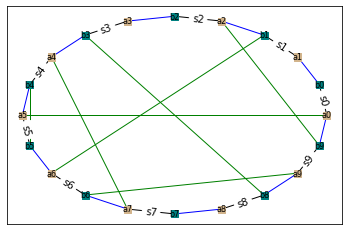

In [2]:
greenEdges = [('b3','b8'),('a7','a4'),('b4','b5'),('a5','a0'),
             ('b1','a6'),('b6','a9'),('b9','a2')]
#greenEdges
#G.edges()
nx.draw_networkx_nodes(G,pos, node_shape="s", label= nx.draw_networkx_labels(G,
    pos, font_size=8), node_color=["tan", "teal"]*10, node_size=50,)


nx.draw_networkx_edges(G, pos,
        edgelist=list(zip(a_nodes, b_nodes)),
        edge_color="black",
        label=nx.draw_networkx_edge_labels(G,pos,edge_labels=bdict), )

nx.draw_networkx_edges(G, pos,
        edgelist=blueEdges,
        edge_color="blue",
        )

nx.draw_networkx_edges(G, pos,
        edgelist=greenEdges,
        edge_color="green", )

bluegreenEdges = [('b2','a3'),('b7','a8'),('b0','a1')]


Above, we only added green edges if they were 'new', meaning there were no identical blue edges.

Every vertex is connected to exactly one black and one blue edge, and to at most one green edge. Therefore the degree of every vertex is either $2$ or $3$.

To transform the reference genome into the $\pi$ genome: delete every blue edge which incidents with a green edge. Then the graph is balanced again (every vertex in degree 2.


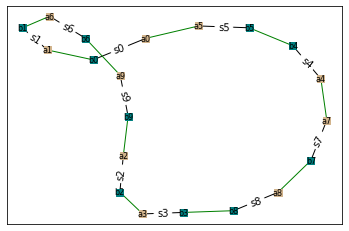

In [3]:
G2 = nx.MultiGraph()
G2.add_edges_from(blackedges + greenEdges + bluegreenEdges)
pos2 = nx.spring_layout(G2)

#nx.draw_networkx_nodes(G2,pos2, node_shape="s", )
nx.draw_networkx_nodes(G2,pos2, node_shape="s", label= nx.draw_networkx_labels(G,
    pos2, font_size=8), node_color=["tan", "teal"]*10, node_size=50,)

nx.draw_networkx_edges(G2, pos2,
        edgelist=list(zip(a_nodes, b_nodes)),
        edge_color="black",
        label=nx.draw_networkx_edge_labels(G,pos2,edge_labels=bdict), )

nx.draw_networkx_edges(G, pos2,
        edgelist=greenEdges + bluegreenEdges,
        edge_color="green", )

#might need a few tries to produce a perfectly circular shape without crossings


So to some it up, if have the breakpoint graph for $2$ genomes, we can alsways reconstruct the second genome from the reference by keeping all the 
crossing green edges and removing blue edges which incident in vertices where green edges also incident in (balancing).

## Basic Structural Variants
All of the basic variants can be represented in a breakpoint graph. 
Here is a deletion.

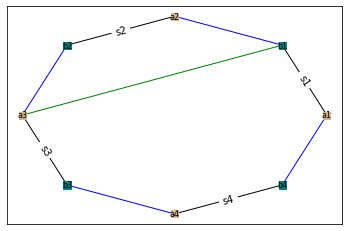

In [4]:
createBPG([1,3,4], [1,2,3,4])


Tandem duplication:
In this case the black edge $s_1$ became green in the plot, since $b_2$ and the replicate $a_2$ are adjacent. 

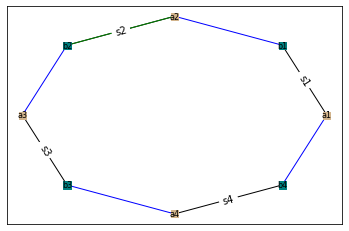

In [5]:
createBPG([1,2,2,3,4], [1,2,3,4])

Insertion can be represented in a BPG, but if we are going to try to build the BPG from a hiC matrix, I am not sure if it is detectable.

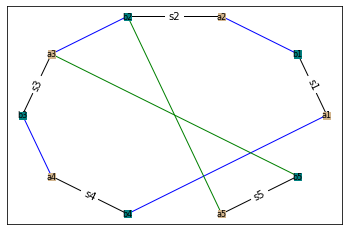

In [6]:
createBPG([1,2,5,3,4], [1,2,3,4])

Interspaced duplication: In this case the resolution of the green genome requires to remove the blue edge $a_4,b_3$ and to traverse the
black edge $s_2$ twice. We cannot remove $(a_3,b_2)$ because then $a_3$ has no exit. But if we keep it and we have to keep by assumption all green edges,
than $b_3$ has degree $3$. So this means $s_2$ must be duplicated.

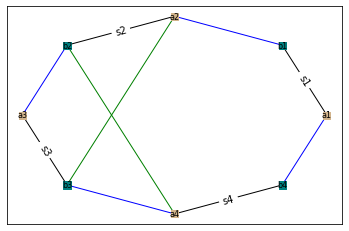

In [7]:
createBPG([1,2,3,2,4], [1,2,3,4])

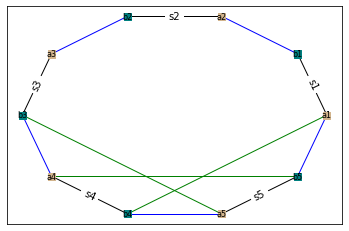

In [11]:
createBPG([1,2,3,5,4], [1,2,3,4,5])

translocation:
resolve by removing all blue edges but $a_1,b_1$

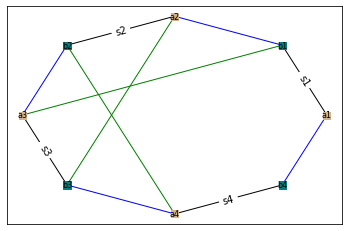

In [12]:
createBPG([1,3,2,4], [1,2,3,4])

Inversion:
resolve by removing the two blue edges which neighbor the two green edges.


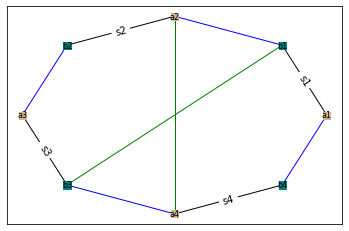

In [13]:
createBPG([1,-3,-2,4], [1,2,3,4])

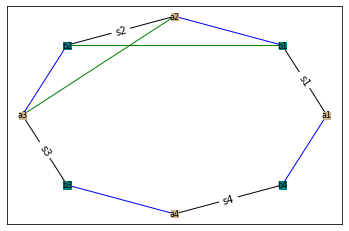

In [14]:
createBPG([1,-2,3,4], [1,2,3,4])